# Posttest KB 6

Import Library yang digunakan


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('motorbike.csv')
data

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,18000,700,41.0,Ural Ranger,03/2021,Gasoline,Manual,Used,Euro4 2WD,/offers/ural-ranger-euro4-2wd-gasoline-black-c...
2,10000,80000,125.0,Harley-Davidson Night Rod,09/2010,Gasoline,Manual,Used,Night rod special,/offers/harley-davidson-night-rod-night-rod-sp...
3,12500,18000,82.0,Harley-Davidson Road King,02/1996,Gasoline,Manual,Used,FLHR Road King,/offers/harley-davidson-road-king-flhr-road-ki...
4,10950,10551,185.0,Suzuki,05/2015,Gasoline,Manual,Used,"Sport GSX R 1000, ABS, Complete titanium Yoshi...",/offers/suzuki-others-sport-gsx-r-1000-abs-com...
...,...,...,...,...,...,...,...,...,...,...
6090,16850,38000,64.0,Harley-Davidson,07/2005,Gasoline,Manual,Used,1450 Heritage Softail Bobber Old Style fs2 gsbblo,/offers/harley-davidson-others-1450-heritage-s...
6091,1350,4200,10.0,Daelim Delfino 125,03/2012,Gasoline,Automatic,Used,SU125E SERVICEHEFT GEPFLEGT,/offers/daelim-delfino-125-su125e-serviceheft-...
6092,8990,22800,97.0,Triumph Thruxton,07/2016,Gasoline,Manual,Used,Triumph Thruxton,/offers/triumph-thruxton-triumph-thruxton-gaso...
6093,17300,10592,125.0,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       6095 non-null   int64  
 1   mileage     6095 non-null   int64  
 2   power       6095 non-null   float64
 3   make_model  6095 non-null   object 
 4   date        6095 non-null   object 
 5   fuel        6095 non-null   object 
 6   gear        6095 non-null   object 
 7   offer_type  6095 non-null   object 
 8   version     6095 non-null   object 
 9   link        6095 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 476.3+ KB


## Preprocessing dataset

Melihat apakah ada data null atau duplikat

In [6]:
data.isna().sum()

price         0
mileage       0
power         0
make_model    0
date          0
fuel          0
gear          0
offer_type    0
version       0
link          0
dtype: int64

Mengubah Nilai Target Dengan Encoding

In [7]:
X = data.drop('price', axis=1) 
y = data['price']

In [8]:
label = LabelEncoder()
y = label.fit_transform(y)

In [13]:
# Memilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['mileage', 'power']
X = data[selected_features]
y = data['price']

Menerapkan One-Hot Encoding menggunakan get_dummies dari Pandas

In [16]:
try:
    X = pd.get_dummies(X, columns=['make_model','date', 'fuel', 'gear', 'offer_type', 'version'], drop_first=True)
except KeyError as e:
    print("KeyError:", e)
    print("Error Details:", str(e))

KeyError: "None of [Index(['make_model', 'date', 'fuel', 'gear', 'offer_type', 'version'], dtype='object')] are in the [columns]"
Error Details: "None of [Index(['make_model', 'date', 'fuel', 'gear', 'offer_type', 'version'], dtype='object')] are in the [columns]"


Standarisasi

In [18]:
print('Nilai standarisasi sebelum dilakukan scaling: ')
std = data.std(numeric_only=True)
np.std(data)

Nilai standarisasi sebelum dilakukan scaling: 


price      1.149368e+07
mileage    1.311406e+05
power      5.773307e+02
dtype: float64

In [19]:
standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(
    data[['mileage', 'power']]
)

In [21]:
print('Nilai sesudah dilakukan scalling: ')
np.std(x_standard)

Nilai sesudah dilakukan scalling: 


0.9999999999999999

## Split dataset menjadi train dan test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

## Model sequential

In [24]:
model = Sequential([
    Dense(units=64, activation='relu',input_shape=(None,1)), #Output Layer Wajib units
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          128       
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

### Model Compile

In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

### Call Back

Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss

In [26]:
stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Callback untuk menyimpan model terbaik berdasarkan validation loss

In [27]:
check = ModelCheckpoint('best_model.h5', save_best_only=True)

### Model Fit

In [31]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs=50, #50x Pembelajaran
    validation_data = (X, y),
    batch_size=64,
    callbacks=[stop, check]
)

Epoch 1/50
81/81 [==============================] - 1s 16ms/step - loss: -3191727.7500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 2/50
81/81 [==============================] - 2s 31ms/step - loss: -3191727.2500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 3/50
81/81 [==============================] - 2s 22ms/step - loss: -3191728.2500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 4/50
81/81 [==============================] - 3s 36ms/step - loss: -3191727.7500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 5/50
81/81 [==============================] - 1s 17ms/step - loss: -3191727.2500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 6/50
81/81 [==============================] - 2s 19ms/step - loss: -3191727.7500 - accuracy: 0.0000e+00 - val_loss: -2747873.7500 - val_accuracy: 0.0000e+00
Epoch 7/50
81/81 [====

In [32]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

### Evaluasi Model

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

29/29 [==============================] - 1s 15ms/step - loss: -235126.8594 - accuracy: 0.0000e+00
Test Loss: -235126.8594
Test Accuracy: 0.0000


### Grafik perbandingan antara accuracy dan loss dari train dan test

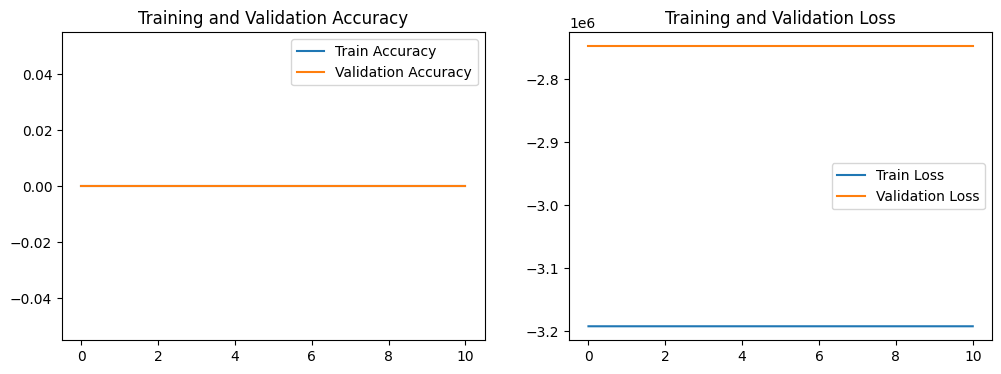

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()